In [1]:
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import nltk
import re
import unidecode
import spacy
from bs4 import BeautifulSoup
from langdetect import detect, DetectorFactory
from collections import Counter
from wordcloud import WordCloud
from tqdm import tqdm
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [2]:
data1 = pd.read_csv('QueryResults_2011.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11821 entries, 0 to 11820
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          11821 non-null  object
 1   Body           11821 non-null  object
 2   CreationDate   11821 non-null  object
 3   Tags           11821 non-null  object
 4   Id             11821 non-null  int64 
 5   Score          11821 non-null  int64 
 6   ViewCount      11821 non-null  int64 
 7   FavoriteCount  11821 non-null  int64 
 8   AnswerCount    11821 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 831.3+ KB


In [3]:
data2 = pd.read_csv('QueryResults_2012.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          14900 non-null  object
 1   Body           14900 non-null  object
 2   CreationDate   14900 non-null  object
 3   Tags           14900 non-null  object
 4   Id             14900 non-null  int64 
 5   Score          14900 non-null  int64 
 6   ViewCount      14900 non-null  int64 
 7   FavoriteCount  14900 non-null  int64 
 8   AnswerCount    14900 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.0+ MB


In [4]:
data = pd.DataFrame()
for i in range(2011, 2021):
    print('Mergin of QueryResults_'+str(i)+'.csv')
    data = pd.concat([data, pd.read_csv('QueryResults_'+str(i)+'.csv')])

Mergin of QueryResults_2011.csv
Mergin of QueryResults_2012.csv
Mergin of QueryResults_2013.csv
Mergin of QueryResults_2014.csv
Mergin of QueryResults_2015.csv
Mergin of QueryResults_2016.csv
Mergin of QueryResults_2017.csv
Mergin of QueryResults_2018.csv
Mergin of QueryResults_2019.csv
Mergin of QueryResults_2020.csv


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106427 entries, 0 to 2660
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Title          106427 non-null  object
 1   Body           106427 non-null  object
 2   CreationDate   106427 non-null  object
 3   Tags           106427 non-null  object
 4   Id             106427 non-null  int64 
 5   Score          106427 non-null  int64 
 6   ViewCount      106427 non-null  int64 
 7   FavoriteCount  106427 non-null  int64 
 8   AnswerCount    106427 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 8.1+ MB


In [6]:
data.head()

,Title,Body,CreationDate,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,5004633,468,202448,52,16
1,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,5004344,6,600,1,2
2,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,5004908,12,5542,2,2
3,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,5004837,10,10385,1,4
4,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,5005409,22,10883,3,2


In [7]:
data.describe()

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,1.064270e+05,106427.000000,1.064270e+05,106427.000000,106427.000000
mean,2.783581e+07,30.789095,3.065461e+04,8.797100,3.946827
std,1.589350e+07,132.607613,1.121593e+05,49.868023,4.363893
min,4.573437e+06,6.000000,5.300000e+01,1.000000,1.000000
25%,1.406999e+07,8.000000,2.416500e+03,2.000000,2.000000
50%,2.565792e+07,12.000000,7.441000e+03,3.000000,3.000000
75%,4.014514e+07,22.000000,2.249700e+04,6.000000,5.000000
max,6.552451e+07,26548.000000,1.029157e+07,11627.000000,136.000000


# Exploration des données

## Variables 'Title' et 'Body' 

In [8]:
data.isnull().sum()

Title            0
Body             0
CreationDate     0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [9]:
data['Id'].duplicated().sum()

0

In [10]:
data['Body'].duplicated().sum()

0

In [11]:
data['Title'].duplicated().sum()

3

In [12]:
data[data['Title'].duplicated(keep=False)]

,Title,Body,CreationDate,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
1097,Unrecognized attribute 'targetFramework'. Note...,<p>I'm trying to up load my site and I'm getti...,2011-09-23 14:38:10,<asp.net>,7530725,428,449863,45,30
1259,Can't connect to local MySQL server through so...,<p>I am trying to run mysql client on my termi...,2011-10-21 00:12:20,<mysql><terminal><rvm><osx-lion><mysql.sock>,7843731,32,123776,14,7
8167,Unrecognized attribute 'targetFramework'. Note...,<p>I have just uploaded a website to my server...,2012-08-09 19:26:29,<c#><asp.net><.net><iis><razor>,11890565,7,45741,1,4
1377,ArgumentError: Factory not registered,"<p>I'm trying to run rspec with FactoryGirl, b...",2014-05-25 00:38:26,<ruby-on-rails><ruby><rspec><factory-bot>,23850979,9,11511,1,2
7498,Can't connect to local MySQL server through so...,<p>I have installed MySQL server and trying to...,2014-03-16 11:05:50,<mysql><sql>,22436028,170,276378,45,19
10475,ArgumentError: Factory not registered,<p>I am trying to get factory girl to run with...,2014-06-06 09:42:18,<ruby-on-rails><ruby-on-rails-4><rspec><factor...,24078768,27,22573,8,3


In [13]:
data.set_index('Id', inplace=True)

In [14]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount
Id,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2


In [15]:
data_len = pd.DataFrame()

In [16]:
data_len['Title_len'] = data['Title'].str.len()
data_len['Body_len'] = data['Body'].str.len()
data_len.index = data.index

In [17]:
data_len.head()

,Title_len,Body_len
Id,,
5004633,88,389
5004344,49,448
5004908,38,135
5004837,57,1901
5005409,91,1573


,count,missing values,min,max,range,mean,median,stdev,skewness,kurtosis
0,106427,0,15,150,135,54.500000,52.000000,"[34.0, 75.0]",0.932502,1.316933


,whis_low,quant25,median,quant75,whis_high,IQR
0,1.0,40.0,52.0,66.0,105.0,26.0


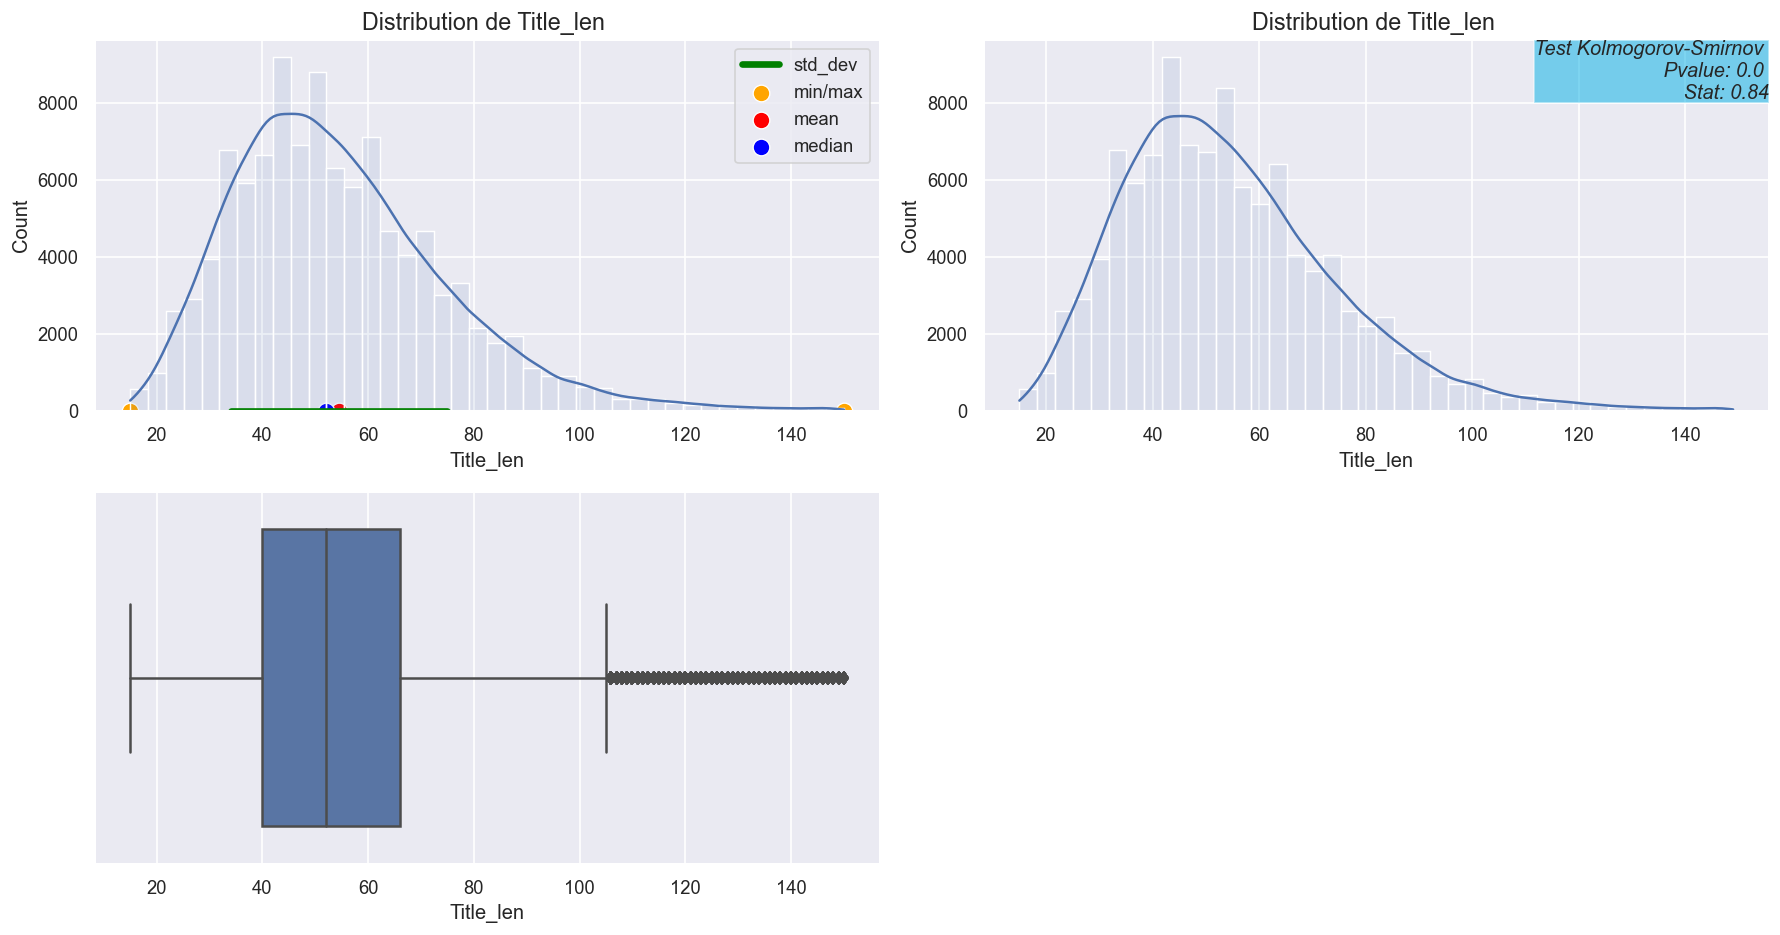

,count,missing values,min,max,range,mean,median,stdev,skewness,kurtosis
0,106427,0,41,33533,33492,1969.600000,1236.000000,"[-520.1, 4459.3]",4.669421,32.406971


,whis_low,quant25,median,quant75,whis_high,IQR
0,-1650.5,697.0,1236.0,2262.0,4609.5,1565.0


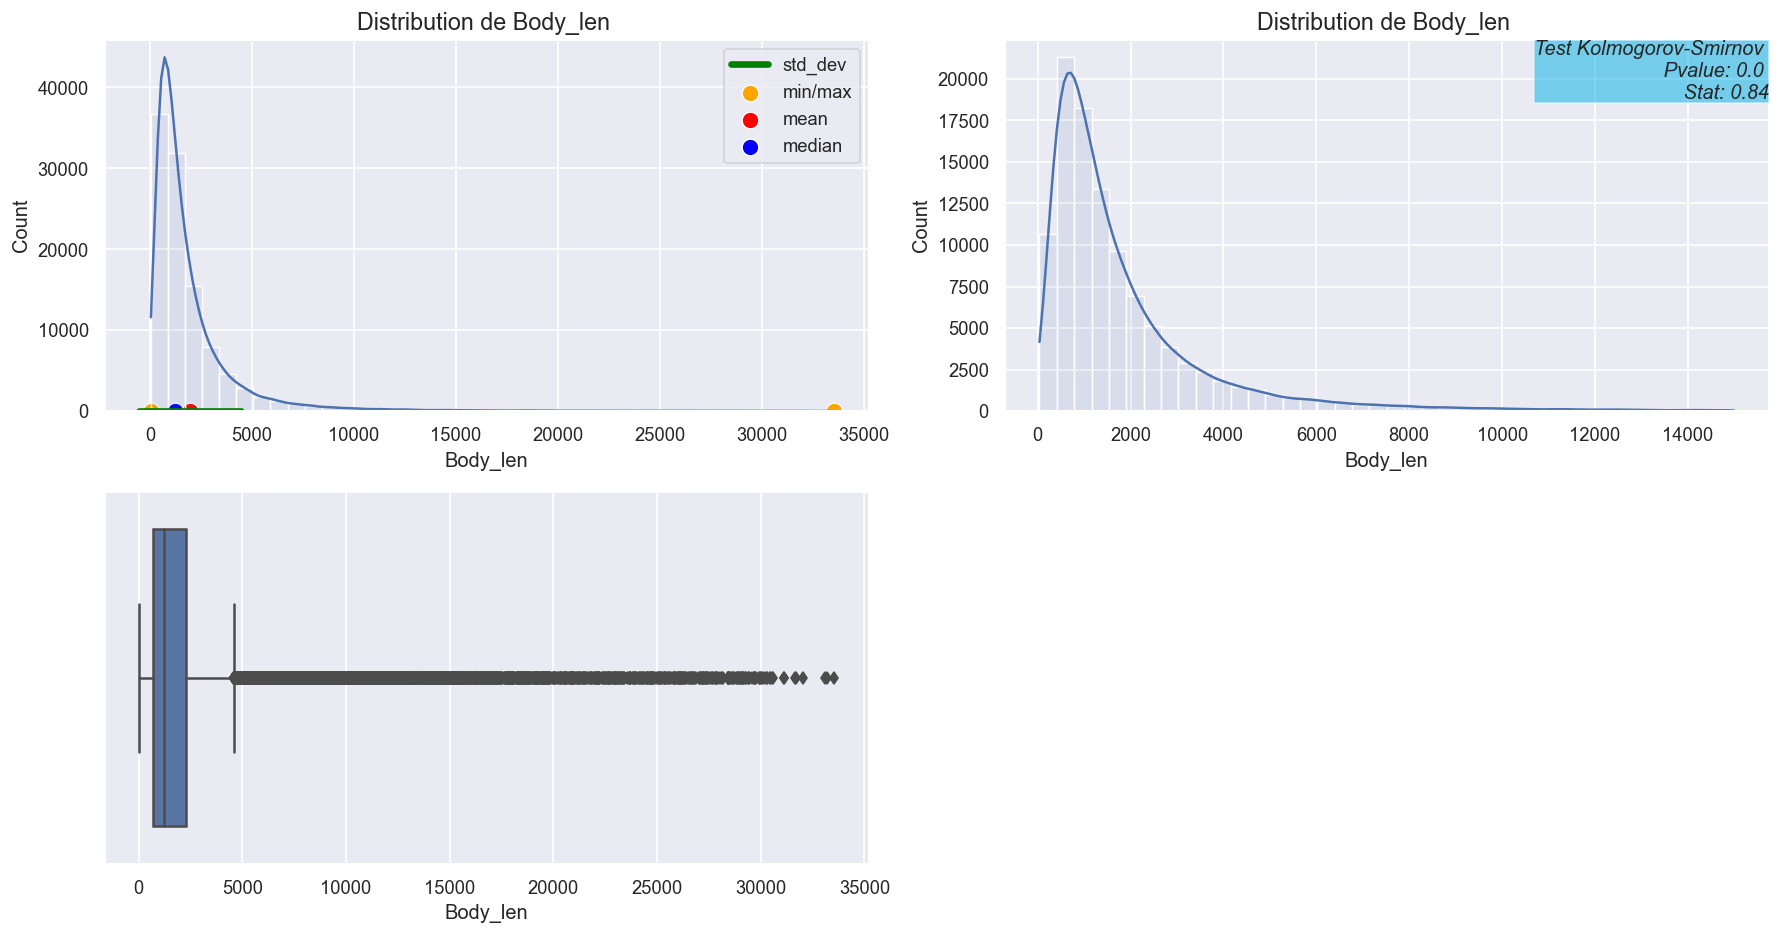

In [18]:
def Univar_Analysis(df, var, lim=None, pos=1):
    count = round(df[var].shape[0], 0)
    miss = round(df[var].isna().sum(), 0)
    mini = df[var].min()
    maxi = round(df[var].max(), 1)
    ran = round(df[var].max()-df[var].min(), 1)
    mean = round(df[var].mean(), 1)
    median = df[var].median()
    st_dev = df[var].std()
    int_std = [round(mean-st_dev, 1), round(mean+st_dev, 1)]
    skew = df[var].skew()
    kurt = df[var].kurtosis()
    stat = np.array([[count, miss, mini, maxi, ran, mean,
                    median, int_std, skew, kurt]], dtype=object)
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    param = pd.DataFrame(stat, columns=['count', 'missing values', 'min',
                         'max', 'range', 'mean', 'median', 'stdev', 'skewness', 'kurtosis'])
    param.round(2)
    param = param.style.set_caption('Variable '+var).set_table_styles(
        [{'selector': 'caption', 'props': [('color', 'red'), ('font-size', '16px')]}])
    display(param)
    sns.set()
    fig = plt.figure(figsize=[15, 15], dpi=120)
    fig.add_subplot(4, 2, 1)
    k = 40
    ax = sns.histplot(data=df, x=var, kde=True,
                      element="bars", bins=k, alpha=0.1)
    ax.set_title("Distribution de {} ".format(var), fontsize=14)
    sns.scatterplot(x=[mini, maxi], y=[0, 0],
                    color='orange', label="min/max", s=100)
    sns.scatterplot(x=[mean], y=[0], color='red', label="mean", s=100)
    sns.lineplot(x=int_std, y=[0, 0], color='green',
                 label="std_dev", linewidth=4)
    sns.scatterplot(x=[median], y=[0], color='blue', label="median", s=100)
    quant25 = df[var].quantile(0.25)
    quant75 = df[var].quantile(0.75)
    IQR = quant75 - quant25
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    box_plt = [whis_low, quant25, median, quant75, whis_high, IQR]
    stat_box = np.array([box_plt])
    param_box = pd.DataFrame(stat_box, columns=[
                             'whis_low', 'quant25', 'median', 'quant75', 'whis_high', 'IQR'])
    param_box.round(2)
    display(param_box)
    if lim is not None:
        fig.add_subplot(4, 2, 2)
        ax = sns.histplot(data=df[df[var]
                          < lim], x=var, kde=True, element="bars", bins=k, alpha=0.1)
        # test Kolmogorof-Smirnov
        kstest = stats.kstest(df[var].notnull(), 'norm')
        ax.set_title("Distribution de {} ".format(var), fontsize=14)
        ax.text(pos, 1, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
                horizontalalignment='right',
                verticalalignment='top',
                style='italic', transform=ax.transAxes, fontsize=12,
                bbox={'facecolor': '#00afe6', 'alpha': 0.5, 'pad': 0})
        fig.add_subplot(4, 2, 3)
        ax = sns.boxplot(x=df[var], showfliers=True)
        plt.xlabel(var, fontsize=12)

    else:
        # test Kolmogorof-Smirnov
        kstest = stats.kstest(df[var].notnull(), 'norm')
        ax.set_title("Distribution de {} ".format(var), fontsize=14)
        ax.text(pos, 0.5, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
                horizontalalignment='right',
                verticalalignment='top',
                style='italic', transform=ax.transAxes, fontsize=12,
                bbox={'facecolor': '#00afe6', 'alpha': 0.7, 'pad': 0})
        fig.add_subplot(4, 2, 2)
        ax = sns.boxplot(x=df[var], showfliers=True)

    fig.tight_layout()
    plt.show()


Univar_Analysis(data_len, 'Title_len', 150)
Univar_Analysis(data_len, 'Body_len', 15000)

In [19]:
print(len(data_len[data_len['Body_len'] > 4500]))

8871


In [20]:
idx = data_len.index[data_len['Body_len'] > 4500].values
print(len(idx))
data = data.drop(idx)
data.shape

8871


(97556, 8)

In [21]:
data['Text'] = data['Title']+data['Body']

In [22]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text
Id,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...


### Analyse de fréquence des mots du texte avant nettoyage

C:\Users\franc\AppData\Local\Temp/ipykernel_29032/460157650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text_split'] = data.str.split(' ')


'the' 595353
'to' 428113
'a' 305497
'I' 286398
'is' 242848
'in' 217659
'and' 210123
'=' 198613
'of' 196237
'that' 134434
'it' 126223
'for' 114991
'this' 112824
'with' 101066
'have' 91175
'{\r\n' 90577
'not' 88650
'on' 86566
'be' 81549
'my' 76532
'but' 75273
'as' 67542
'an' 66692
'if' 61154
'from' 60883
'can' 59029
'using' 52992
'are' 50925
'or' 49827
'do' 44523
'am' 44483
'like' 43697
'there' 41699
'when' 41159
'use' 40115
'at' 39785
'new' 39124
'code' 38693
'<a' 37421
'return' 37089
'which' 36335
'would' 35522
'get' 35185
'by' 32909
'-' 32430
'some' 32418
'any' 31150
'all' 30461
'want' 29749
'so' 29535


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


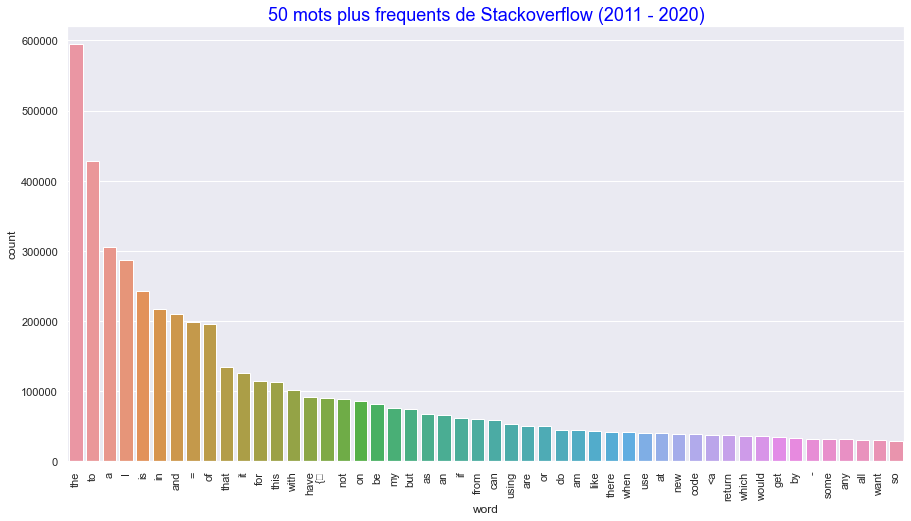

In [23]:
def word_freq(data, ylim):
    data['Text_split'] = data.str.split(' ')
    word_list = data['Text_split'].tolist()
    word_list = [item for sublist in word_list for item in sublist if item]
    word_list = ' '.join(word_list)
    word_list = word_list.split(' ')
    word_counts = Counter(word_list)
    for w in word_counts.most_common(50):
        print(repr(w[0]), repr(w[1]))
    df = pd.DataFrame(word_counts.most_common(50))
    df.set_index(0, inplace=True)
    fig = plt.figure(figsize=(15, 8))
    sns.barplot(x=df.index, y=df[1])
    plt.xticks(rotation=90)
    plt.ylim(0, ylim)
    plt.xlabel('word')
    plt.ylabel('count')
    plt.title("50 mots plus frequents de Stackoverflow (2011 - 2020)",
              fontsize=18, color="blue")
    plt.show()
    return word_list


word_list = word_freq(data['Text'], 620000)

In [24]:
data['Text_split'] = data['Text'].str.split(' ')
word_list = data['Text_split'].tolist()
word_list = [item for sublist in word_list for item in sublist if item]
word_list = ' '.join(word_list)
word_list = word_list.split(' ')
word_counts = Counter(word_list)
df = word_counts.most_common(500)
freq_dict = {}
for i in df:
    freq_dict[i[0]] = i[1]

(-0.5, 899.5, 499.5, -0.5)

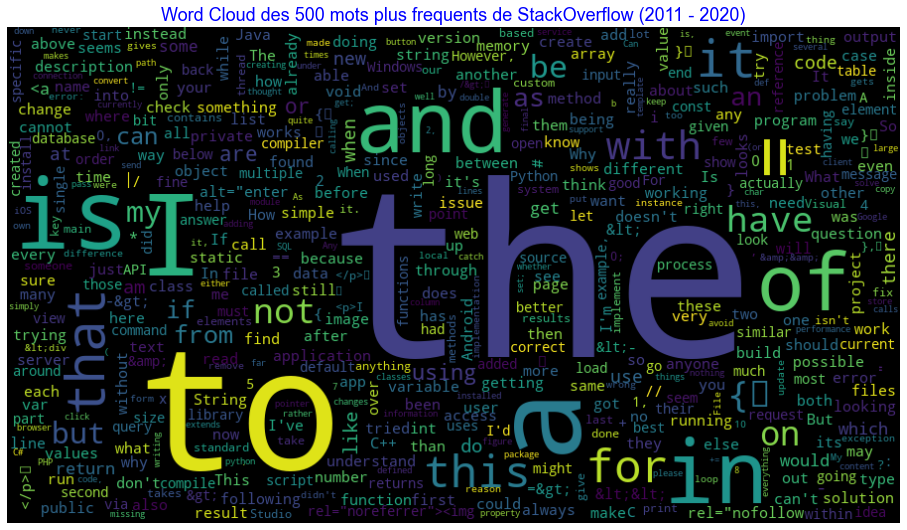

In [25]:
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(freq_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud des 500 mots plus frequents de StackOverflow (2011 - 2020)",
          fontsize=18, color="blue")
plt.axis("off")

In [26]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split
Id,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ..."
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM..."
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...,"[Determine, the, format, of, an, image, file?<..."
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v..."
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte..."


## Variable 'Tags' 

In [27]:
data['Tags'].head()

Id
5004633    <windows><.htaccess><windows-xp><filenames>
5004344              <javascript><jquery><html><opera>
5004908                  <c#><image><image-processing>
5004837                                <python><class>
5005409                      <c#><assembly-resolution>
Name: Tags, dtype: object

In [28]:
data['Tags_split'] = data['Tags'].str.replace('><', ' ')
data['Tags_split'] = data['Tags_split'].str.replace('>', '')
data['Tags_split'] = data['Tags_split'].str.replace('<', '')
data['Tags_split'] = data['Tags_split'].str.split(' ')

In [29]:
data['Tags_split'].head()

Id
5004633    [windows, .htaccess, windows-xp, filenames]
5004344              [javascript, jquery, html, opera]
5004908                  [c#, image, image-processing]
5004837                                [python, class]
5005409                      [c#, assembly-resolution]
Name: Tags_split, dtype: object

In [30]:
Tags_list = data['Tags_split'].tolist()
Tags_list = [item for sublist in Tags_list for item in sublist if item]
Tags_counts = Counter(Tags_list)

### Nombre de tags par question

In [31]:
data['Tags_len'] = data['Tags_split'].apply(lambda x: len(x))

In [32]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len
Id,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v...","[python, class]",2
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2


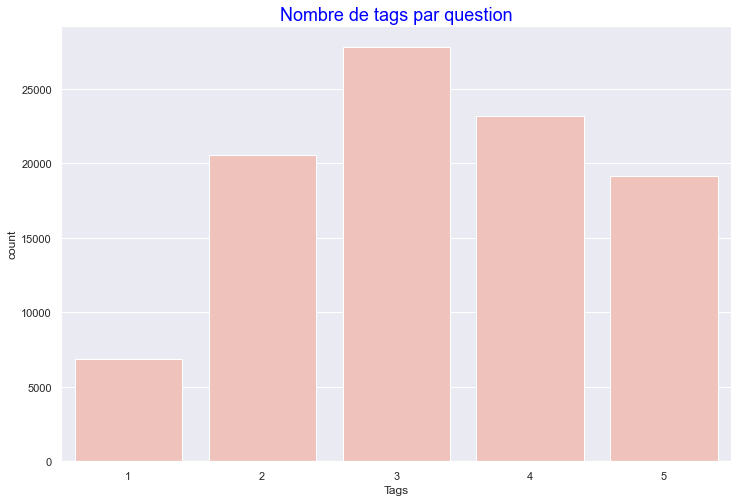

In [33]:
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data['Tags_len'], color='#F7BDB3')
ax.set_xlabel("Tags")
plt.title("Nombre de tags par question", fontsize=18, color="blue")
plt.show()

### Analyse de fréquence des tags

In [34]:
for t in Tags_counts.most_common(50):
    print(repr(t[0]), repr(t[1]))

'c++' 11510
'javascript' 10143
'java' 9601
'c#' 9403
'python' 8671
'android' 6610
'c' 4647
'ios' 4378
'php' 4311
'html' 3786
'css' 3118
'jquery' 2932
'.net' 2710
'c++11' 2542
'algorithm' 2416
'performance' 2120
'r' 2000
'swift' 1868
'node.js' 1798
'arrays' 1678
'objective-c' 1570
'mysql' 1564
'sql' 1539
'linux' 1445
'git' 1440
'multithreading' 1271
'string' 1233
'angular' 1228
'xcode' 1120
'windows' 1117
'json' 1113
'sql-server' 1077
'asp.net' 1036
'reactjs' 1031
'python-3.x' 1025
'regex' 1001
'language-lawyer' 972
'gcc' 971
'iphone' 909
'haskell' 895
'angularjs' 858
'macos' 841
'ruby' 836
'google-chrome' 825
'ruby-on-rails' 812
'numpy' 784
'typescript' 781
'java-8' 779
'asp.net-mvc' 772
'visual-studio' 765


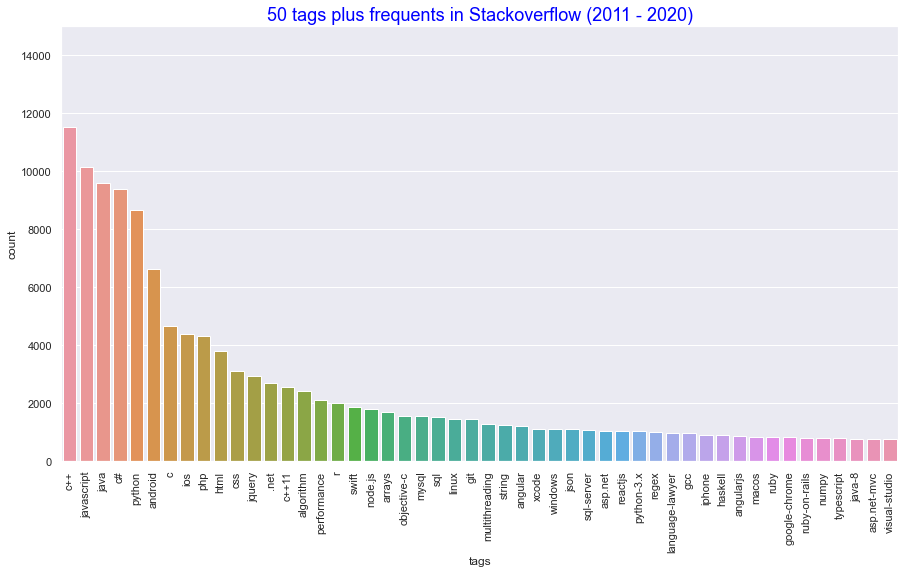

In [35]:
df_tags = pd.DataFrame(Tags_counts.most_common(50))
df_tags.set_index(0, inplace=True)
fig = plt.figure(figsize=(15, 8))
sns.barplot(x=df_tags.index, y=df_tags[1])
plt.xticks(rotation=90)
plt.ylim(0, 15000)
plt.xlabel('tags')
plt.ylabel('count')
plt.title("50 tags plus frequents in Stackoverflow (2011 - 2020)",
          fontsize=18, color="blue")
plt.show()

In [36]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len
Id,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v...","[python, class]",2
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2


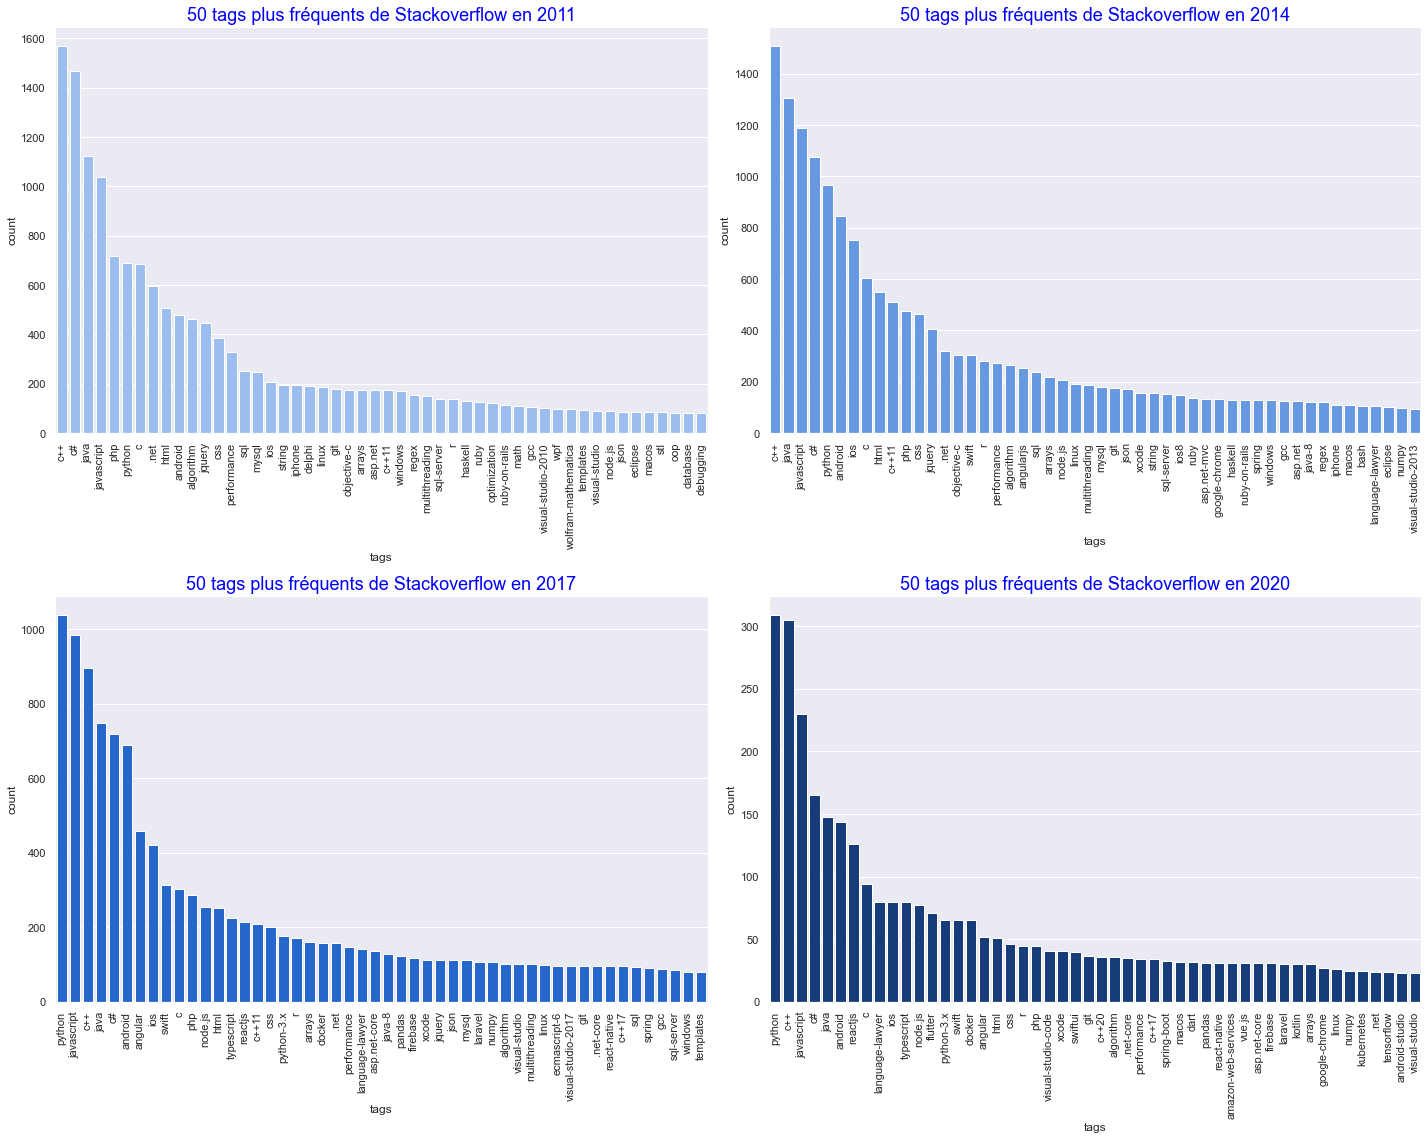

In [37]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

years = [2011, 2014, 2017, 2020]
fig = plt.figure(1, figsize=(20, 16))
colors = ['#8FBBFB', '#5295F8', '#0962E5', '#053A89']
for k in range(len(years)):
    Tags_list = []
    Tags_list = data[data['CreationDate'].dt.year ==
                     years[k]]['Tags_split'].tolist()
    Tags_list = [item for sublist in Tags_list for item in sublist if item]
    Tags_list = Counter(Tags_list)
    df_tags = pd.DataFrame(Tags_list.most_common(50))
    df_tags.set_index(0, inplace=True)

    ax = fig.add_subplot(2, 2, k+1)
    sns.barplot(x=df_tags.index, y=df_tags[1], color=colors[k])
    plt.xticks(rotation=90)
    plt.xlabel('tags')
    plt.ylabel('count')
    ax.set_title("50 tags plus fréquents de Stackoverflow en {}".format(years[k]),
                 fontsize=18, color="blue")
fig.tight_layout()
plt.show()

In [38]:
print('Nombre de tags uniques: ', data['Tags'].nunique())

Nombre de tags uniques:  72381


In [39]:
tags_list = Tags_counts.most_common(int(50))
print(len(tags_list))
best_tags = [i[0] for i in tags_list]
print(best_tags[:10])

50
['c++', 'javascript', 'java', 'c#', 'python', 'android', 'c', 'ios', 'php', 'html']


In [40]:
idx = []
t = 0
best_tags = [i[0] for i in tags_list]
for i in data.index:
    t += 1
#    print(t)
    # print(i)
    flag = 0
    for item in data.loc[i, 'Tags_split']:
        # print(item)
        if item in best_tags and flag == 0:
            # print('OK')
            idx.append(i)
            flag = 1
data = data.loc[idx]

In [41]:
data.shape

(85236, 12)

In [42]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len
Id,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v...","[python, class]",2
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2


In [43]:
print(best_tags)

['c++', 'javascript', 'java', 'c#', 'python', 'android', 'c', 'ios', 'php', 'html', 'css', 'jquery', '.net', 'c++11', 'algorithm', 'performance', 'r', 'swift', 'node.js', 'arrays', 'objective-c', 'mysql', 'sql', 'linux', 'git', 'multithreading', 'string', 'angular', 'xcode', 'windows', 'json', 'sql-server', 'asp.net', 'reactjs', 'python-3.x', 'regex', 'language-lawyer', 'gcc', 'iphone', 'haskell', 'angularjs', 'macos', 'ruby', 'google-chrome', 'ruby-on-rails', 'numpy', 'typescript', 'java-8', 'asp.net-mvc', 'visual-studio']


In [44]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len
Id,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v...","[python, class]",2
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2


In [45]:
lists = []
for idx in data.index:
    tags = []
    for element in data.loc[idx, 'Tags_split']:
        if element in best_tags:
            tags.append(element)
    lists.append(tags)

data['Best_Tags'] = pd.Series(lists, index=data.index)
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags
Id,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows]
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]"
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#]
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v...","[python, class]",2,[python]
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#]


In [46]:
data.shape

(85236, 13)

# Pre-processing du texte

## Suppression des questions en langue différente de l'anglais 

In [47]:
tqdm.pandas()
data['Lang'] = data['Text'].progress_apply(detect)

100%|██████████| 85236/85236 [06:41<00:00, 212.34it/s]


In [48]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags,Lang
Id,,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows],en
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]",en
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?<p>How c...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#],en
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v...","[python, class]",2,[python],en
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#],en


In [49]:
pd.DataFrame(data.Lang.value_counts())

,Lang
en,85108
ca,48
fr,38
nl,13
da,10
ro,3
pt,3
so,3
es,2
de,2


In [50]:
data = data[data['Lang'] == 'en']

In [51]:
data.shape

(85108, 14)

## Suppression 'URL'

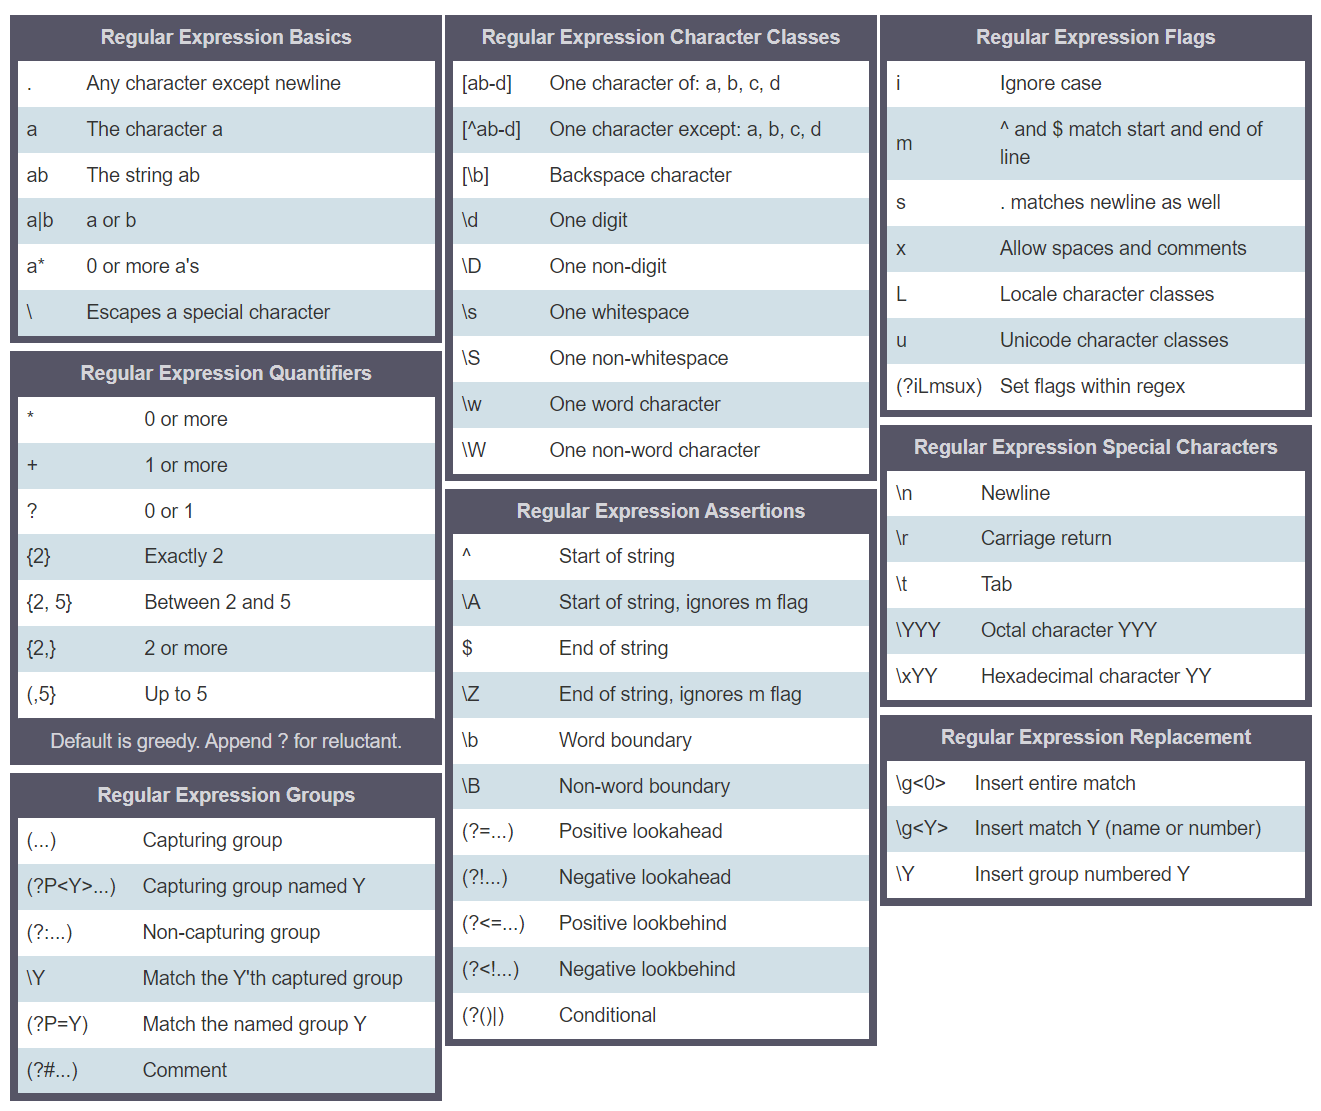

In [52]:
print(data.loc[5026197, 'Text'])

What C++ Smart Pointer Implementations are available?<h2><strong>Comparisons, Pros, Cons, and When to Use?</strong></h2>

<p>This is a spin-off from a <a href="https://stackoverflow.com/questions/5009869/how-to-implement-garbage-collection-in-c/5010007#5010007">garbage collection thread</a> where what I thought was a simple answer generated a lot of comments about some specific smart pointer implementations so it seemed worth starting a new post.</p>

<p>Ultimately the question is what are the various implementations of smart pointers in C++ out there and how do they compare?  Just simple pros and cons or exceptions and gotchas to something you might otherwise think should work.</p>

<p>I've posted some implementations that I've used or at least glossed over and considered using as an answer below and my understanding of their differences and similarities which may not be 100% accurate so feel free to fact check or correct me as needed.</p>

<p>The goal is to learn about some new objec

In [53]:
def find_suppr_urls(var):
    nr_urls = 0
    for i in data.index:
        nr_urls += len(re.findall(r'http\S+', data.loc[i, var]))
        data.loc[i, var] = re.sub(r'http\S+', '', data.loc[i, var])
    print("{} urls supprimés dans la variable {}".format(nr_urls, var))
    return


find_suppr_urls('Text')

84794 urls supprimés dans la variable Text


In [54]:
print(data.loc[5026197, 'Text'])

What C++ Smart Pointer Implementations are available?<h2><strong>Comparisons, Pros, Cons, and When to Use?</strong></h2>

<p>This is a spin-off from a <a href=" collection thread</a> where what I thought was a simple answer generated a lot of comments about some specific smart pointer implementations so it seemed worth starting a new post.</p>

<p>Ultimately the question is what are the various implementations of smart pointers in C++ out there and how do they compare?  Just simple pros and cons or exceptions and gotchas to something you might otherwise think should work.</p>

<p>I've posted some implementations that I've used or at least glossed over and considered using as an answer below and my understanding of their differences and similarities which may not be 100% accurate so feel free to fact check or correct me as needed.</p>

<p>The goal is to learn about some new objects and libraries or correct my usage and understanding of existing implementations already widely in use and 

## Suppression HTML tags 

In [55]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text


data['Text'] = data['Text'].progress_apply(remove_html_tags)

100%|██████████| 85108/85108 [00:29<00:00, 2920.64it/s]


In [56]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags,Lang
Id,,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,How do I manually create a file with a . (dot)...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows],en
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser from enriching HTML5 fie...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]",en
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,Determine the format of an image file?How can ...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#],en
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,calling class/static method from class variabl...,"[calling, class/static, method, from, class, v...","[python, class]",2,[python],en
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception with Resolving assemblies: Attempt t...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#],en


In [57]:
print(data.loc[5026197, 'Text'])

What C++ Smart Pointer Implementations are available?Comparisons, Pros, Cons, and When to Use?
This is a spin-off from a <a href=" collection thread</a> where what I thought was a simple answer generated a lot of comments about some specific smart pointer implementations so it seemed worth starting a new post.
Ultimately the question is what are the various implementations of smart pointers in C++ out there and how do they compare?  Just simple pros and cons or exceptions and gotchas to something you might otherwise think should work.
I've posted some implementations that I've used or at least glossed over and considered using as an answer below and my understanding of their differences and similarities which may not be 100% accurate so feel free to fact check or correct me as needed.
The goal is to learn about some new objects and libraries or correct my usage and understanding of existing implementations already widely in use and end up with a decent reference for others.



## Suppression contractions en anglais

In [58]:
def remove_contractions(text):
    decontracted_text = contractions.fix(text)
    return decontracted_text


data['Text'] = data['Text'].progress_apply(remove_contractions)

100%|██████████| 85108/85108 [00:03<00:00, 23406.29it/s]


In [59]:
print(data.loc[5026197, 'Text'])

What C++ Smart Pointer Implementations are available?Comparisons, Pros, Cons, and When to Use?
This is a spin-off from a <a href=" collection thread</a> where what I thought was a simple answer generated a lot of comments about some specific smart pointer implementations so it seemed worth starting a new post.
Ultimately the question is what are the various implementations of smart pointers in C++ out there and how do they compare?  Just simple pros and cons or exceptions and gotchas to something you might otherwise think should work.
I have posted some implementations that I have used or at least glossed over and considered using as an answer below and my understanding of their differences and similarities which may not be 100% accurate so feel free to fact check or correct me as needed.
The goal is to learn about some new objects and libraries or correct my usage and understanding of existing implementations already widely in use and end up with a decent reference for others.



## POS Tagging 

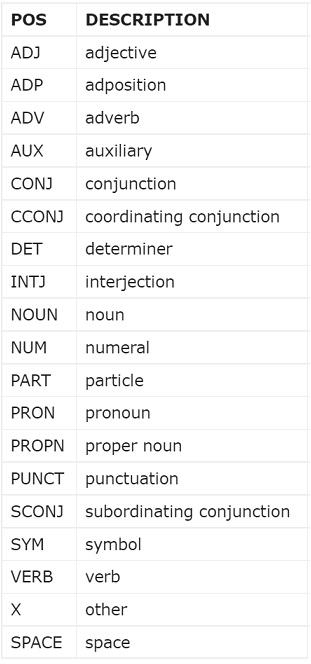

In [60]:
nlp = spacy.load('en_core_web_sm', exclude=['ner', 'parser', 'lemmatizer'])

#pos_list = ["NOUN","PROPN","ADJ","VERB","ADVERB"]
#pos_list = ["NOUN", "PROPN"]

doc = nlp(data.loc[5026197, 'Text'])
token_list = []
for token in doc:
    token_list.append(token.pos_)
print(token_list)

['PRON', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'AUX', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'CCONJ', 'SCONJ', 'PART', 'PROPN', 'PUNCT', 'SPACE', 'DET', 'AUX', 'DET', 'NOUN', 'PUNCT', 'NOUN', 'ADP', 'DET', 'X', 'DET', 'NUM', 'PUNCT', 'NOUN', 'X', 'X', 'SCONJ', 'PRON', 'PRON', 'VERB', 'AUX', 'DET', 'ADJ', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'DET', 'ADJ', 'ADJ', 'NOUN', 'NOUN', 'SCONJ', 'PRON', 'VERB', 'ADJ', 'VERB', 'DET', 'ADJ', 'NOUN', 'PUNCT', 'SPACE', 'ADV', 'DET', 'NOUN', 'AUX', 'PRON', 'AUX', 'DET', 'ADJ', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'ADP', 'PROPN', 'ADV', 'ADV', 'CCONJ', 'SCONJ', 'AUX', 'PRON', 'VERB', 'PUNCT', 'SPACE', 'ADV', 'ADJ', 'NOUN', 'CCONJ', 'NOUN', 'CCONJ', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON', 'PRON', 'AUX', 'ADV', 'VERB', 'AUX', 'VERB', 'PUNCT', 'SPACE', 'PRON', 'AUX', 'VERB', 'DET', 'NOUN', 'PRON', 'PRON', 'AUX', 'VERB', 'CCONJ', 'ADP', 'ADJ', 'VERB', 'ADP', 'CCONJ', 'VERB', 'VERB', 'ADP', 'DET', 'NOUN', 'ADV', 'CCONJ', 'PRON', 'NOUN'

In [61]:
nlp = spacy.load('en_core_web_sm', exclude=['ner', 'parser', 'lemmatizer'])

pos_list = ["NOUN", "PROPN"]


def POS_tag(text):
    doc = nlp(text)
    list_text = []
    for token in doc:

        if token.pos_ in pos_list:
            list_text.append(token.text)
    text = ' '.join(list_text)
    return text


data['Text'] = data['Text'].progress_apply(POS_tag)

100%|██████████| 85108/85108 [10:59<00:00, 129.00it/s]


In [62]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags,Lang
Id,,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,file dot prefix Windows example .htaccessI fil...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows],en
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser HTML5 fieldsI'm loads in...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]",en
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,format image file?How image format image file ...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#],en
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,class static method class variable pythonI'm I...,"[calling, class/static, method, from, class, v...","[python, class]",2,[python],en
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception Resolving assemblies executable fixu...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#],en


In [63]:
print(data.loc[5026197, 'Text'])

C++ Smart Pointer Implementations available?Comparisons Pros Cons Use spin off collection answer lot comments pointer implementations post question implementations pointers C++ pros cons exceptions gotchas implementations answer understanding differences similarities % fact goal objects libraries usage understanding implementations use reference others


## Suppression caractères non pertinentes

In [64]:
# remplacement caractères [!”$%&’()*,-./:;<=>?@[\]^_`{|}~]: (tous caractères sauf caractères de a à z et de A à Z, + et #) avec ''
def remove_non_alphanumeric(text):
    return re.sub('[^a-z+#A-Z]', ' ', text)


data['Text'] = data['Text'].progress_apply(remove_non_alphanumeric)

100%|██████████| 85108/85108 [00:01<00:00, 69912.13it/s]


In [65]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags,Lang
Id,,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,file dot prefix Windows example htaccessI fil...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows],en
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,Prevent Opera browser HTML fieldsI m loads in...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]",en
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,format image file How image format image file ...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#],en
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,class static method class variable pythonI m I...,"[calling, class/static, method, from, class, v...","[python, class]",2,[python],en
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,Exception Resolving assemblies executable fixu...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#],en


In [66]:
print(data.loc[5026197, 'Text'])

C++ Smart Pointer Implementations available Comparisons Pros Cons Use spin off collection answer lot comments pointer implementations post question implementations pointers C++ pros cons exceptions gotchas implementations answer understanding differences similarities   fact goal objects libraries usage understanding implementations use reference others


## Suppression des caractères accentués 

In [67]:
def remove_accented_chars(text):
    return unidecode.unidecode(text)


data['Text'] = data['Text'].progress_apply(remove_accented_chars)

100%|██████████| 85108/85108 [00:00<00:00, 892147.73it/s]


##  Conversion des caractères en minuscules

In [68]:
def convert_to_low_case(text):
    return text.lower()


data['Text'] = data['Text'].progress_apply(convert_to_low_case)

100%|██████████| 85108/85108 [00:00<00:00, 956513.23it/s]


In [69]:
print(data.loc[5026197, 'Text'])

c++ smart pointer implementations available comparisons pros cons use spin off collection answer lot comments pointer implementations post question implementations pointers c++ pros cons exceptions gotchas implementations answer understanding differences similarities   fact goal objects libraries usage understanding implementations use reference others


## Tokenization 

In [70]:
def tokenize(text):
    return word_tokenize(text)


data['Text'] = data['Text'].progress_apply(tokenize)

100%|██████████| 85108/85108 [00:16<00:00, 5062.65it/s]


In [71]:
print(data.loc[5026197, 'Text'])

['c++', 'smart', 'pointer', 'implementations', 'available', 'comparisons', 'pros', 'cons', 'use', 'spin', 'off', 'collection', 'answer', 'lot', 'comments', 'pointer', 'implementations', 'post', 'question', 'implementations', 'pointers', 'c++', 'pros', 'cons', 'exceptions', 'gotchas', 'implementations', 'answer', 'understanding', 'differences', 'similarities', 'fact', 'goal', 'objects', 'libraries', 'usage', 'understanding', 'implementations', 'use', 'reference', 'others']


## Suppression stopwords 

In [72]:
sw_nltk = stopwords.words('english')

print(sw_nltk)


def remove_stopwords(text):
    removed_stopwords = [word for word in text if word not in sw_nltk]
    return removed_stopwords


data['Text'] = data['Text'].progress_apply(remove_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

100%|██████████| 85108/85108 [00:07<00:00, 10674.37it/s]


In [73]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags,Lang
Id,,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,"[file, dot, prefix, windows, example, htaccess...","[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows],en
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,"[prevent, opera, browser, html, fieldsi, loads...","[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]",en
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,"[format, image, file, image, format, image, fi...","[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#],en
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,"[class, static, method, class, variable, pytho...","[calling, class/static, method, from, class, v...","[python, class]",2,[python],en
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,"[exception, resolving, assemblies, executable,...","[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#],en


In [74]:
print(data.loc[5026197, 'Text'])

['c++', 'smart', 'pointer', 'implementations', 'available', 'comparisons', 'pros', 'cons', 'use', 'spin', 'collection', 'answer', 'lot', 'comments', 'pointer', 'implementations', 'post', 'question', 'implementations', 'pointers', 'c++', 'pros', 'cons', 'exceptions', 'gotchas', 'implementations', 'answer', 'understanding', 'differences', 'similarities', 'fact', 'goal', 'objects', 'libraries', 'usage', 'understanding', 'implementations', 'use', 'reference', 'others']


## Lemmatization 

In [75]:
lemma = WordNetLemmatizer()


def lemmatization(text):
    return [lemma.lemmatize(word=w, pos='v') for w in text]


data['Text'] = data['Text'].progress_apply(lemmatization)

100%|██████████| 85108/85108 [00:14<00:00, 5800.32it/s]


In [76]:
data.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags,Lang
Id,,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,"[file, dot, prefix, windows, example, htaccess...","[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows],en
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,"[prevent, opera, browser, html, fieldsi, load,...","[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]",en
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,"[format, image, file, image, format, image, fi...","[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#],en
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,"[class, static, method, class, variable, pytho...","[calling, class/static, method, from, class, v...","[python, class]",2,[python],en
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,"[exception, resolve, assemblies, executable, f...","[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#],en


In [77]:
print(data.loc[5026197, 'Text'])

['c++', 'smart', 'pointer', 'implementations', 'available', 'comparisons', 'pros', 'con', 'use', 'spin', 'collection', 'answer', 'lot', 'comment', 'pointer', 'implementations', 'post', 'question', 'implementations', 'pointers', 'c++', 'pros', 'con', 'exceptions', 'gotchas', 'implementations', 'answer', 'understand', 'differences', 'similarities', 'fact', 'goal', 'object', 'libraries', 'usage', 'understand', 'implementations', 'use', 'reference', 'others']


## Suppression tokens avec longueur < 2 

In [78]:
def remove_short(text):
    return [i for i in text if (len(i) > 2 or i == 'c' or i == 'c#')]


# on garde le token C
data['Text'] = data['Text'].progress_apply(remove_short)

100%|██████████| 85108/85108 [00:01<00:00, 70003.32it/s] 


In [79]:
print(data.loc[5026197, 'Text'])

['c++', 'smart', 'pointer', 'implementations', 'available', 'comparisons', 'pros', 'con', 'use', 'spin', 'collection', 'answer', 'lot', 'comment', 'pointer', 'implementations', 'post', 'question', 'implementations', 'pointers', 'c++', 'pros', 'con', 'exceptions', 'gotchas', 'implementations', 'answer', 'understand', 'differences', 'similarities', 'fact', 'goal', 'object', 'libraries', 'usage', 'understand', 'implementations', 'use', 'reference', 'others']


## Conversion en string

In [80]:
data1.shape

(11821, 9)

In [81]:
data = data[data['Text'].str.len() != 0]

In [82]:
data.shape

(85103, 14)

In [83]:
def convert_to_string(text):
    return ' '.join(text)


data1 = data.copy(deep=True)
data1['Text'] = data1['Text'].progress_apply(convert_to_string)

100%|██████████| 85103/85103 [00:00<00:00, 534434.68it/s]


In [84]:
data1.head()

,Title,Body,CreationDate,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Text,Text_split,Tags_split,Tags_len,Best_Tags,Lang
Id,,,,,,,,,,,,,,
5004633,How do I manually create a file with a . (dot)...,<p>I want to create a <code>.htaccess</code> f...,2011-02-15 14:06:26,<windows><.htaccess><windows-xp><filenames>,468,202448,52,16,file dot prefix windows example htaccessi file...,"[How, do, I, manually, create, a, file, with, ...","[windows, .htaccess, windows-xp, filenames]",4,[windows],en
5004344,Prevent Opera browser from enriching HTML5 fields,<p>I'm using loads of inputs with HTML5 types ...,2011-02-15 13:39:05,<javascript><jquery><html><opera>,6,600,1,2,prevent opera browser html fieldsi load input ...,"[Prevent, Opera, browser, from, enriching, HTM...","[javascript, jquery, html, opera]",4,"[javascript, jquery, html]",en
5004908,Determine the format of an image file?,<p>How can I programatically determine the ima...,2011-02-15 14:32:33,<c#><image><image-processing>,12,5542,2,2,format image file image format image file enco...,"[Determine, the, format, of, an, image, file?<...","[c#, image, image-processing]",3,[c#],en
5004837,calling class/static method from class variabl...,<p>I'm trying to make a ImageLoader class hand...,2011-02-15 14:25:07,<python><class>,10,10385,1,4,class static method class variable pythoni ima...,"[calling, class/static, method, from, class, v...","[python, class]",2,[python],en
5005409,Exception with Resolving assemblies: Attempt t...,<p>I'm embedding required assemblies to my pro...,2011-02-15 15:12:43,<c#><assembly-resolution>,22,10883,3,2,exception resolve assemblies executable fixups...,"[Exception, with, Resolving, assemblies:, Atte...","[c#, assembly-resolution]",2,[c#],en


In [85]:
print(data1.loc[5026197, 'Text'])

c++ smart pointer implementations available comparisons pros con use spin collection answer lot comment pointer implementations post question implementations pointers c++ pros con exceptions gotchas implementations answer understand differences similarities fact goal object libraries usage understand implementations use reference others


## Analyse de fréquence des mots du texte après nettoyage

C:\Users\franc\AppData\Local\Temp/ipykernel_29032/460157650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text_split'] = data.str.split(' ')


'code' 53569
'class' 51001
'file' 50597
'function' 47492
'string' 41230
'error' 40278
'int' 39620
'c' 38906
'data' 37302
'value' 36839
'type' 33427
'way' 28870
'time' 28636
'name' 28518
'object' 27249
'java' 26007
'android' 25476
'app' 24411
'var' 22164
'list' 21502
'problem' 21375
'array' 21151
'line' 20254
'method' 20197
'example' 20059
'user' 19947
'test' 19844
'question' 19162
'std' 17665
'system' 16963
'text' 16834
'result' 16563
'number' 16461
'image' 16275
'application' 16262
'python' 15459
'project' 14809
'case' 14797
'server' 14744
'version' 14631
'import' 14580
'c++' 13282
'thread' 13217
'size' 13215
'table' 12823
'return' 12819
'page' 12631
'program' 12394
'message' 12390
'view' 12358


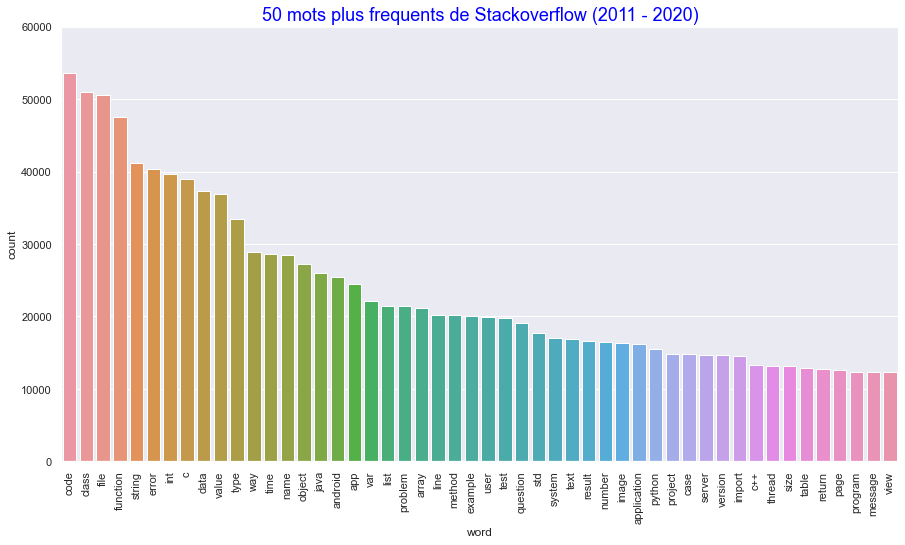

In [86]:
word_list = word_freq(data1['Text'], 60000)

In [87]:
data1['Text_split'] = data1['Text'].str.split(' ')
word_list = data1['Text_split'].tolist()
word_list = [item for sublist in word_list for item in sublist if item]
word_list = ' '.join(word_list)
word_list = word_list.split(' ')
word_counts = Counter(word_list)
df = word_counts.most_common(500)
freq_dict = {}
for i in df:
    freq_dict[i[0]] = i[1]

(-0.5, 899.5, 499.5, -0.5)

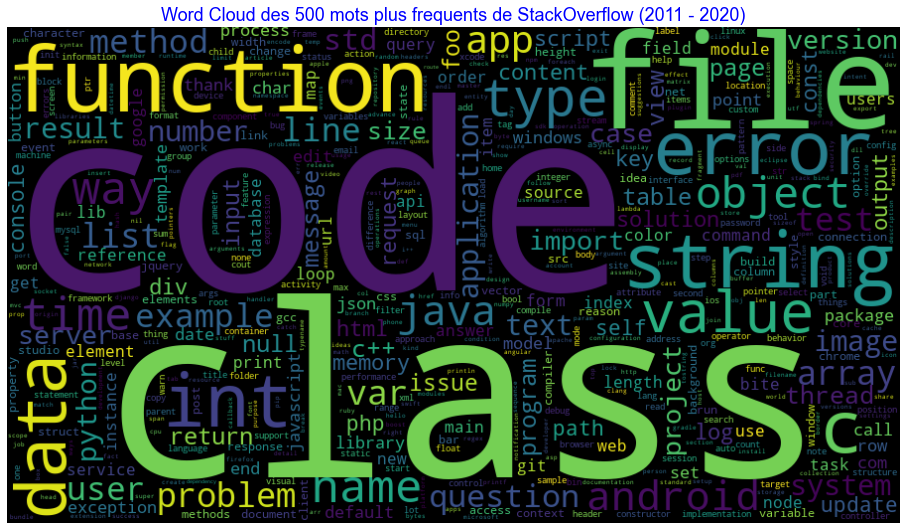

In [88]:
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(freq_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud des 500 mots plus frequents de StackOverflow (2011 - 2020)",
          fontsize=18, color="blue")
plt.axis("off")

# Création du dataset

In [89]:
data['Tags'] = data['Best_Tags']

In [90]:
data = data[['Text', 'Tags']]

In [91]:
data.head()

,Text,Tags
Id,,
5004633,"[file, dot, prefix, windows, example, htaccess...",[windows]
5004344,"[prevent, opera, browser, html, fieldsi, load,...","[javascript, jquery, html]"
5004908,"[format, image, file, image, format, image, fi...",[c#]
5004837,"[class, static, method, class, variable, pytho...",[python]
5005409,"[exception, resolve, assemblies, executable, f...",[c#]


In [92]:
data.to_csv("Query_results_2011_2020_cleaned.csv")